In [ ]:
https://medium.com/geekculture/time-series-analysis-using-arima-model-with-python-afe4b41bbec8

In [1]:
#import pandas
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import itertools
import warnings
import statsmodels.api as smb
import statsmodels.api as sm

In [2]:
#Opening poc dataframe with AirStation 16 data
#############################################

poc_16 = pd.read_csv ("../data/processed/poc_16.csv", sep= ',')
poc_16.index = poc_16.TIME
poc_16 = poc_16[["NO2_index"]]
poc_16.head()

,NO2_index
TIME,
2019-01-01 00:59:59,53.0
2019-01-01 01:59:59,44.0
2019-01-01 02:59:59,54.0
2019-01-01 03:59:59,43.0
2019-01-01 04:59:59,42.0


<AxesSubplot:title={'center':'NO2_index'}, xlabel='TIME'>

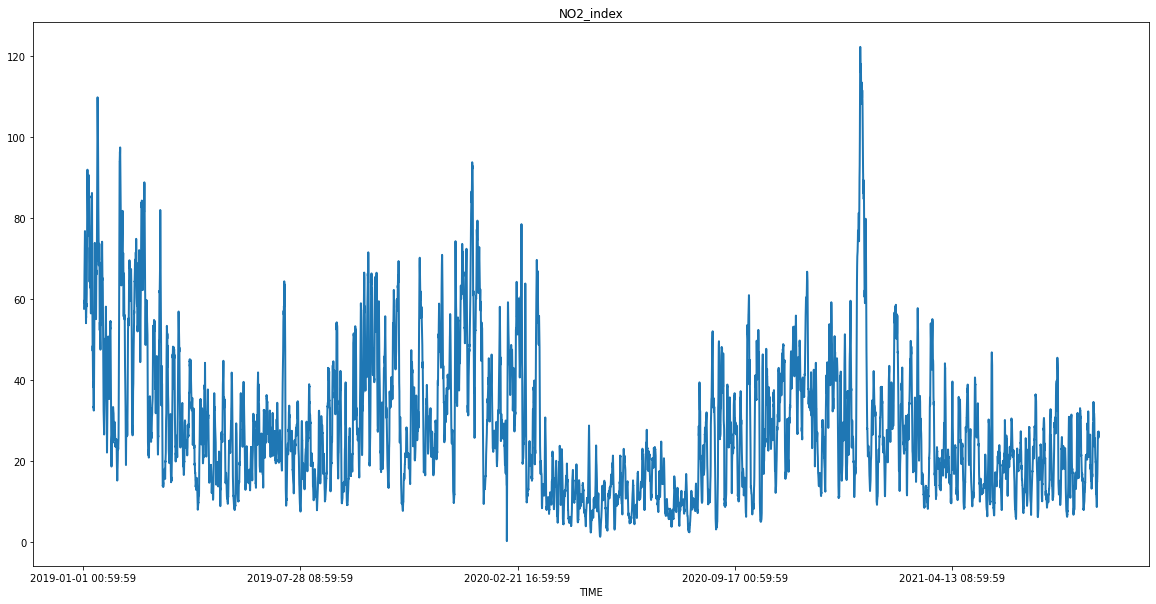

In [3]:
dfpTempSl_mean = poc_16.NO2_index.rolling(window=24).mean()
dfpTempSl_mean.plot(figsize=(20, 10), linewidth=2, y='Degree(Fahrenheit)',
color='tab:blue', title='NO2_index')

In [10]:
seasonal_decompose?

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(poc_16["NO2_index"],
model='additive', extrapolate_trend='freq', period=2000)
plt.rcParams.update({'figure.figsize': (20, 10)})
result_add.plot().suptitle('', fontsize=15)
plt.show()

KeyboardInterrupt: 

In [23]:
#SARIMA ITERATOR
################

p = d = q = range(0, 3)
#generate patterns from p,q,r
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for SARIMA..')
print('SARIMAX: {} * {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} * {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} * {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} * {}'.format(pdq[3], seasonal_pdq[2]))

Examples of parameter combinations for SARIMA..
SARIMAX: (0, 0, 1) * (0, 0, 1, 24)
SARIMAX: (0, 0, 1) * (0, 0, 1, 24)
SARIMAX: (0, 0, 2) * (0, 0, 2, 24)
SARIMAX: (0, 1, 0) * (0, 0, 2, 24)


In [24]:
#SARIMA MODEL
#############


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                one_step_df.NO2_index,
                order=param, seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}*{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [4]:
mod = sm.tsa.statespace.SARIMAX(
    poc_16.NO2_index,
    order=(3, 0, 3), seasonal_order=(3, 1, 1, 24),
    enforce_stationarity=False,
    enforce_invertibility=False)
results = mod.fit()

/Users/cortinas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/cortinas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/cortinas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:

pred = results.get_prediction(start=pd.to_datetime('2020-01-01 00:59:59'), 
dynamic=False, full_results=True)
pred_ci = pred.conf_int()

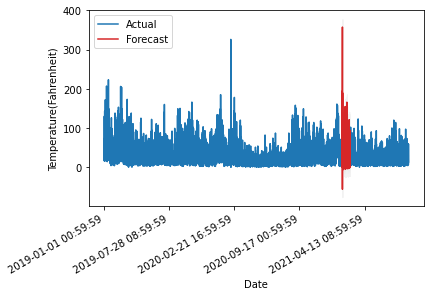

In [22]:

ax = poc_16.NO2_index['2019':].plot(label='Actual', color='tab:blue')
pred.predicted_mean.plot(ax=ax, label='Forecast', color='tab:red')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('NO2_index")')
plt.legend()
plt.show()

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-05-01'),
dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()